# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

## 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

In [2]:
#Single Agent
#env = UnityEnvironment(file_name='Reacher.app')
#Multiaple Agents
env = UnityEnvironment(file_name="Reacher_multi.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


## The Agent DDPG Setup

In [8]:
import matplotlib.pyplot as plt
from collections import namedtuple, deque
%matplotlib inline

def ddpg_train(n_episodes=500, max_t=1000, print_every=100):
    scores_window = deque(maxlen=print_every)
    scores_list = []
    
    for i_episode in range(1, n_episodes+1):
        
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        states = env_info.vector_observations
        avg_score = 0
        agent.reset()
        
        for t in range(max_t): 
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            avg_score += sum(rewards) / len(rewards)

        scores_window.append(avg_score)
        scores_list.append(avg_score)
  
        print('\rEpisode {}\tCurrent Score: {:.2f}\tAverage Score: {:.2f}'.format(i_episode, avg_score, np.mean(scores_window)), end="")

        if i_episode % print_every == 0:
            print('\rEpisode {}\tCurrent Score: {:.2f}\tAverage Score: {:.2f}'.format(i_episode, avg_score, np.mean(scores_window)))
            
        if np.mean(scores_window) >= 30.0 and i_episode >= 100:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            break

    return scores_list

## Training the Agent

In [9]:
#==================================================================
#======================Main Program Call===========================
#==================================================================
import time
import pandas as pd
from ddpg_agent import Agent

#================ Hyperpramters =========================

BUFFER_SIZE = int(1e6)  # replay buffer size
BATCH_SIZE = 512        # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 1e-4         # learning rate of the actor 
LR_CRITIC = 3e-4        # learning rate of the critic
WEIGHT_DECAY = 0   # L2 weight decay

ACTOR_HL_SIZE= [400, 300]         #Actor Hidden layers
CRITIC_HL_SIZE= [400, 300]        #Critic Hidden layers

start_time = time.time()          #Start Timer

model_num = 512                   #Model Number

#Creating an Agent with state size and action size matching the enivorment given parameters [State = 33, actions=4]
agent = Agent (num_agents, state_size, action_size, 0,
               BUFFER_SIZE, BATCH_SIZE, GAMMA, TAU, LR_ACTOR, LR_CRITIC, WEIGHT_DECAY,
              ACTOR_HL_SIZE, CRITIC_HL_SIZE)

#================ Run Training =========================

scores = ddpg_train(n_episodes=150, max_t=1000, print_every=10)

#Plot the time needed to finish the training 
print("Environment solved in {:.2f} seconds".format(time.time() - start_time))


Episode 10	Current Score: 3.58	Average Score: 1.24
Episode 20	Current Score: 36.44	Average Score: 22.87
Episode 30	Current Score: 37.63	Average Score: 38.04
Episode 40	Current Score: 37.23	Average Score: 37.47
Episode 50	Current Score: 37.33	Average Score: 37.49
Episode 60	Current Score: 36.90	Average Score: 37.59
Episode 70	Current Score: 38.22	Average Score: 38.09
Episode 80	Current Score: 38.10	Average Score: 38.04
Episode 90	Current Score: 38.43	Average Score: 38.24
Episode 100	Current Score: 37.22	Average Score: 37.73

Environment solved in 100 episodes!	Average Score: 37.73
Environment solved in 7182.46 seconds


NameError: name 'torch' is not defined

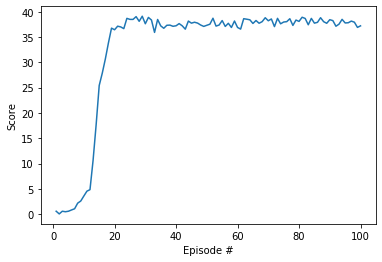

In [11]:
import torch
import os 
import pandas as pd

#Save the agent actor-critic network models
torch.save(agent.actor_local.state_dict(), 'actor_model_{}.pth'.format(model_num))
torch.save(agent.critic_local.state_dict(),'critic_model_{}.pth'.format(model_num))

#================ Plot results =========================
#Plot results
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

#================ Save Results =========================
os.system(f'mkdir -p results/model-{model_num}')
df = pd.DataFrame({'episode':np.arange(len(scores)),'score':scores})
df.set_index('episode', inplace=True)
df.to_csv('results/model-{}/scores.csv'.format(model_num))
    

## Watching the trained Agent

In [12]:
def run_smart_agent(agent):
    env_info = env.reset(train_mode=False)[brain_name]
    states = env_info.vector_observations
    score = 0
    while True:
        actions= agent.act(states, add_noise=False)
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        states = next_states
        score += sum(rewards) / len(rewards)
        if any(dones):                                       # exit loop if episode finished
            break
    print("Score: {}".format(score))

In [14]:
#==================================================================
#======================Watch The Trained Agent ===========================
#==================================================================

ddpg_agent = Agent (num_agents, state_size, action_size, 0,
               BUFFER_SIZE, BATCH_SIZE, GAMMA, TAU, LR_ACTOR, LR_CRITIC, WEIGHT_DECAY,
              ACTOR_HL_SIZE, CRITIC_HL_SIZE)

ddpg_agent.actor_local.load_state_dict(torch.load('actor_model_{}.pth'.format(model_num)))
ddpg_agent.critic_local.load_state_dict(torch.load('critic_model_{}.pth'.format(model_num)))
run_smart_agent(ddpg_agent)

Score: 38.85499913152333


In [15]:
env.close()